In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
def calculate_monthly_returns(df_daily):
    df_monthly = df_daily.resample("M").agg({"Close": "last", "Open": "first"})
    df_monthly.index = df_monthly.index.to_period("M").to_timestamp("M") + pd.offsets.MonthEnd(0)
    return df_monthly

In [3]:
def calculate_entry_prices(df_daily, day=31):
    df_daily_filter = df_daily.loc[df_daily.index.day <= day]
    df_monthly = calculate_monthly_returns(df_daily_filter)
    df_monthly_close = df_monthly['Close']
    series_entry = df_monthly_close.shift(1)
    series_entry.dropna(inplace=True)
    return series_entry

In [4]:
def calculate_exit_prices(df_daily, day=3):
    df_daily_filter = df_daily.loc[df_daily.index.day > day]
    df_monthly = calculate_monthly_returns(df_daily_filter)
    return df_monthly['Open']

In [5]:
def calculate_cumulative_returns(series_entry, series_exit, year=None):
    if year is not None:
        series_entry = series_entry[series_entry.index.year >= year]
        series_exit = series_exit[series_exit.index.year >= year]
    
    perc_returns = (series_exit - series_entry) / series_entry
    cumulative_returns = (1 + perc_returns).cumprod() - 1
    cumulative_returns.dropna(inplace=True)
    return cumulative_returns

In [6]:
def calculate_drawdown(cumulative_returns):
    returns_peak = cumulative_returns.cummax()
    drawdown = (((1 + cumulative_returns) - (1 + returns_peak)) / (1 + returns_peak)) * 100
    return drawdown

In [43]:
def max_consecutive(condition):
    max_count = 0
    current_count = 0

    for value in condition:
        if value:
            current_count += 1
            max_count = max(max_count, current_count)
        else:
            current_count = 0

    return max_count


In [46]:
def calculate_backtest_metrics(entry_prices, exit_prices, year=None):
    
    if year is not None:
        entry_prices = entry_prices[entry_prices.index.year >= year]
        exit_prices = exit_prices[exit_prices.index.year >= year]
    
    entry_prices_aligned = entry_prices[entry_prices.index.isin(exit_prices.index)]
    exit_prices_aligned = exit_prices[exit_prices.index.isin(entry_prices.index)]
    
    cumulative_returns = calculate_cumulative_returns(entry_prices_aligned, exit_prices_aligned)
    drawdown = calculate_drawdown(cumulative_returns)
    
    num_trades = len(entry_prices_aligned)
    num_winners = len(entry_prices_aligned[entry_prices_aligned < exit_prices_aligned])
    num_losers = len(entry_prices_aligned[entry_prices_aligned > exit_prices_aligned])
    
    recovery_factor = -entry_prices_aligned[entry_prices_aligned > exit_prices_aligned].sum() / entry_prices_aligned[entry_prices_aligned < exit_prices_aligned].sum()
    cumulative_return = cumulative_returns[-1]
    accuracy = num_winners / num_trades
    max_drawdown = drawdown.min()
    
    consecutive_wins = max_consecutive(entry_prices_aligned < exit_prices_aligned)
    consecutive_losses = max_consecutive(entry_prices_aligned > exit_prices_aligned)
    
    backtest_results = {
        'Num_Trades': num_trades,
        'Num_Winners': num_winners,
        'Num_Losers': num_losers,
        'Recovery_Factor': recovery_factor,
        'Cumulative_Return': cumulative_return,
        'Accuracy': accuracy,
        'Max_Drawdown': max_drawdown,
        'Consecutive_Wins': consecutive_wins,
        'Consecutive_Losses': consecutive_losses
    }
    
    return backtest_results


In [7]:
# Baixa os dados da ação desejada
df_daily = yf.download('^BVSP', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [8]:
# Calcula os preços de entrada
stock_entry = calculate_entry_prices(df_daily)
# Calcula os preços de saída
stock_exit = calculate_exit_prices(df_daily)

In [9]:
# Calcula os retornos acumulados
stock_cum_return = calculate_cumulative_returns(stock_entry, stock_exit)
# Calcula o drawdown
stock_drawdown = calculate_drawdown(stock_cum_return)

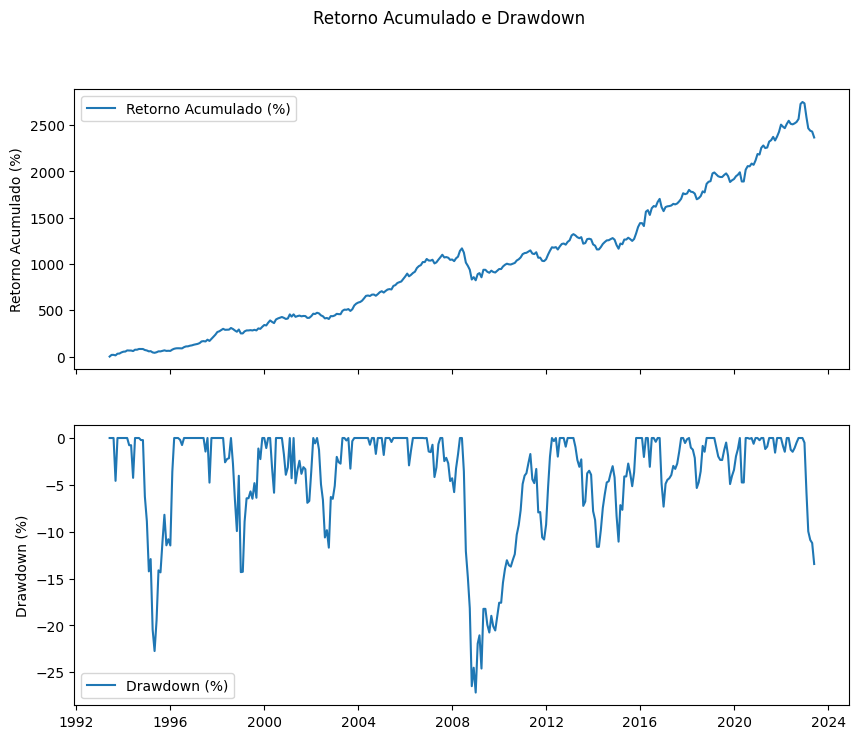

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
ax1.plot(stock_cum_return.index, stock_cum_return * 100, label="Retorno Acumulado (%)")
ax1.set_ylabel("Retorno Acumulado (%)")
ax2.plot(stock_drawdown.index, stock_drawdown, label="Drawdown (%)")
ax2.set_ylabel("Drawdown (%)")
ax1.legend()
ax2.legend()
plt.suptitle("Retorno Acumulado e Drawdown")
plt.show()

In [11]:
# Calcula os retornos acumulados
stock_cum_return = calculate_cumulative_returns(stock_entry, stock_exit, 2015)
# Calcula o drawdown
stock_drawdown = calculate_drawdown(stock_cum_return)


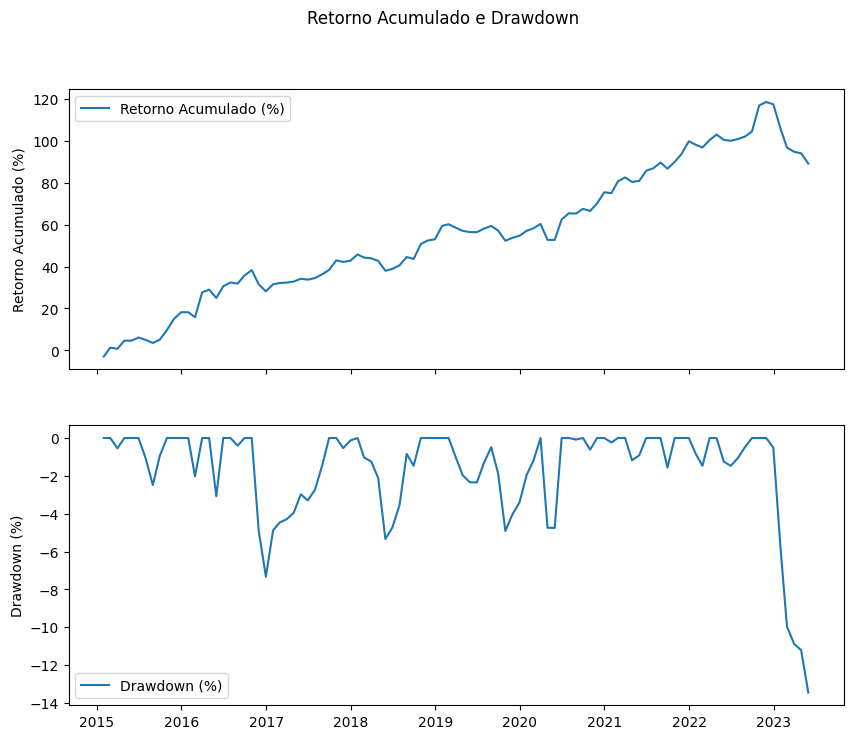

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
ax1.plot(stock_cum_return.index, stock_cum_return * 100, label="Retorno Acumulado (%)")
ax1.set_ylabel("Retorno Acumulado (%)")
ax2.plot(stock_drawdown.index, stock_drawdown, label="Drawdown (%)")
ax2.set_ylabel("Drawdown (%)")
ax1.legend()
ax2.legend()
plt.suptitle("Retorno Acumulado e Drawdown")
plt.show()

In [13]:
# Calcula os preços de entrada
stock_entry = calculate_entry_prices(df_daily)
# Calcula os preços de saída
stock_exit = calculate_exit_prices(df_daily, 4)
# Calcula os retornos acumulados
stock_cum_return = calculate_cumulative_returns(stock_entry, stock_exit, 2015)
# Calcula o drawdown
stock_drawdown = calculate_drawdown(stock_cum_return)


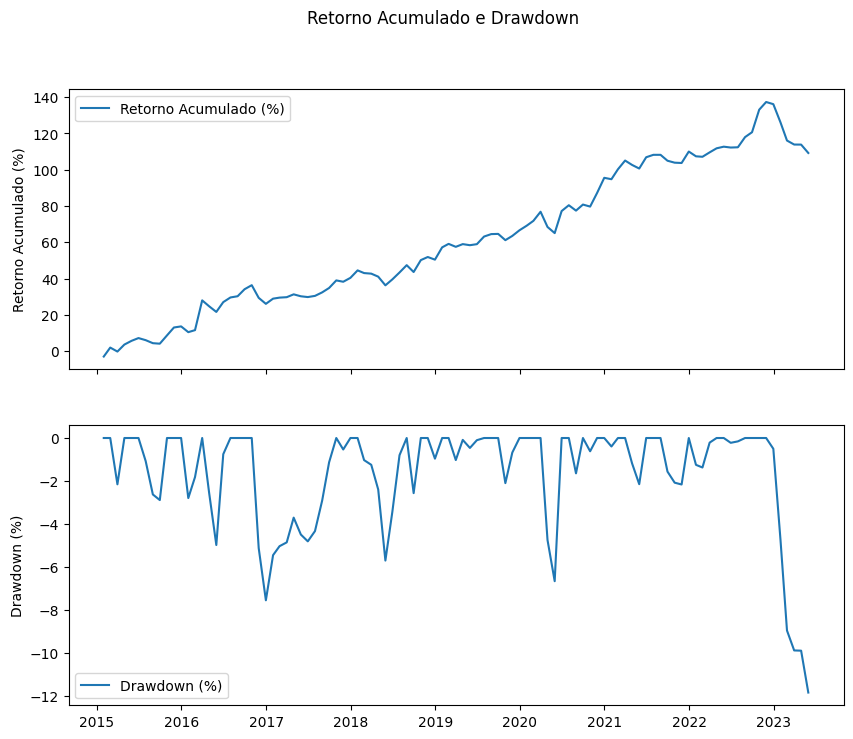

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
ax1.plot(stock_cum_return.index, stock_cum_return * 100, label="Retorno Acumulado (%)")
ax1.set_ylabel("Retorno Acumulado (%)")
ax2.plot(stock_drawdown.index, stock_drawdown, label="Drawdown (%)")
ax2.set_ylabel("Drawdown (%)")
ax1.legend()
ax2.legend()
plt.suptitle("Retorno Acumulado e Drawdown")
plt.show()

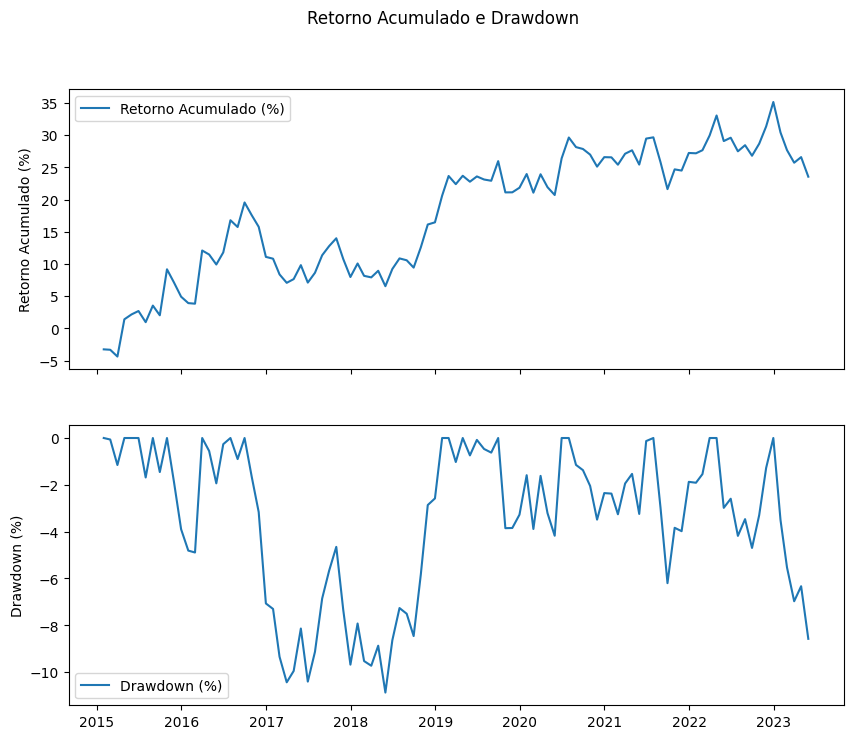

In [16]:
# Calcula os preços de entrada
stock_entry = calculate_entry_prices(df_daily,28)
# Calcula os preços de saída
stock_exit = calculate_exit_prices(df_daily, 2)
# Calcula os retornos acumulados
stock_cum_return = calculate_cumulative_returns(stock_entry, stock_exit, 2015)
# Calcula o drawdown
stock_drawdown = calculate_drawdown(stock_cum_return)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
ax1.plot(stock_cum_return.index, stock_cum_return * 100, label="Retorno Acumulado (%)")
ax1.set_ylabel("Retorno Acumulado (%)")
ax2.plot(stock_drawdown.index, stock_drawdown, label="Drawdown (%)")
ax2.set_ylabel("Drawdown (%)")
ax1.legend()
ax2.legend()
plt.suptitle("Retorno Acumulado e Drawdown")
plt.show()

In [47]:
stock_entry = calculate_entry_prices(df_daily)
stock_exit = calculate_exit_prices(df_daily)

backtest_results = calculate_backtest_metrics(stock_entry, stock_exit)

for key, value in backtest_results.items():
    print(f"{key}: {value}")

Num_Trades: 361
Num_Winners: 225
Num_Losers: 131
Recovery_Factor: -0.6321041017962309
Cumulative_Return: 23.667053844261844
Accuracy: 0.6232686980609419
Max_Drawdown: -27.168623250921982
Consecutive_Wins: 11
Consecutive_Losses: 6
